In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch . nn as nn
import torch . optim as optim
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import math
from sklearn.metrics import mean_squared_error 

In [2]:
X_train = pd.read_csv('Train_Orig_Int.csv')
X_train = X_train.drop('LoanApproved' , axis=1)
y_train = X_train['RiskScore']
X_train = X_train.drop('RiskScore' , axis=1)
X_train.head()

,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,NumberOfDependents,...,TotalAssets,TotalLiabilities,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio
0,57,47030,511,0,0,35,15823,24,1,2,...,40365,6059,2196.833333,0.714049,2,34306,0.235323,0.260626,852.957015,0.572168
1,31,44704,587,0,3,6,42377,84,1,4,...,110710,14780,3725.333333,0.720363,6,95930,0.273877,0.328652,1294.384120,0.429863
2,40,86684,609,0,3,18,17768,36,0,4,...,100857,64598,7223.666667,0.722829,2,36259,0.198268,0.215082,674.055334,0.164329
3,59,207724,666,0,2,36,19782,60,1,0,...,79800,7461,17310.333333,0.906780,3,72339,0.191782,0.184749,507.457337,0.052596
4,32,54324,574,0,4,12,37298,48,0,1,...,20723,34235,4527.000000,0.703866,4,9862,0.245298,0.244149,1224.554472,0.390005


In [3]:
X_validation = pd.read_csv('Valid_Orig_Int.csv')
X_validation = X_validation.drop('LoanApproved' , axis=1)
y_validation = X_validation['RiskScore']
X_validation = X_validation.drop('RiskScore' , axis=1)
X_validation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 33 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         4000 non-null   int64  
 1   AnnualIncome                4000 non-null   int64  
 2   CreditScore                 4000 non-null   int64  
 3   EmploymentStatus            4000 non-null   int64  
 4   EducationLevel              4000 non-null   int64  
 5   Experience                  4000 non-null   int64  
 6   LoanAmount                  4000 non-null   int64  
 7   LoanDuration                4000 non-null   int64  
 8   MaritalStatus               4000 non-null   int64  
 9   NumberOfDependents          4000 non-null   int64  
 10  HomeOwnershipStatus         4000 non-null   int64  
 11  MonthlyDebtPayments         4000 non-null   int64  
 12  CreditCardUtilizationRate   4000 non-null   float64
 13  NumberOfOpenCreditLines     4000 

In [4]:
X_test = pd.read_csv('Test_Orig_Int.csv')
X_test = X_test.drop('LoanApproved' , axis=1)
y_test = X_test['RiskScore']
X_test = X_test.drop('RiskScore' , axis=1)

In [5]:
y_validation.info()

<class 'pandas.core.series.Series'>
RangeIndex: 4000 entries, 0 to 3999
Series name: RiskScore
Non-Null Count  Dtype  
--------------  -----  
4000 non-null   float64
dtypes: float64(1)
memory usage: 31.4 KB


In [6]:
class SingleLayer(nn.Module):
    def __init__(self,hidden1):
        super().__init__()
        self.layers = nn.Sequential(
        nn.Linear(33, hidden1),
        nn.Sigmoid(),
        nn.Linear(hidden1, 1)
        )
    def forward(self, x):
        return self.layers(x)

In [7]:
X_training = X_train.values
y_training = y_train.values
X_validation = X_validation.values
y_validation = y_validation.values
X_testing = X_test.values
y_testing = y_test.values

In [8]:
X_train, y_train = torch.tensor(X_training, dtype=torch.float32), torch.tensor(y_training, dtype=torch.float32).view(-1, 1)
X_val, y_val = torch.tensor(X_validation, dtype=torch.float32), torch.tensor(y_validation, dtype=torch.float32).view(-1, 1)
X_test, y_test = torch.tensor(X_testing, dtype=torch.float32), torch.tensor(y_testing, dtype=torch.float32).view(-1, 1)

In [9]:
print(X_training.shape)

(12000, 33)


Training Losses for hidden layer 8
             0
0  2680.589355
1  2678.974609
2  2677.362061
3  2675.827881
4  2674.210938
 RMSE for validation set is : 48.244165571794795
 RMSE for test set is : 48.03400996462038
Training Losses for hidden layer 16
             0
0  2636.319336
1  2634.492676
2  2632.777344
3  2631.099609
4  2629.490967
 RMSE for validation set is : 43.98872647213857
 RMSE for test set is : 43.773825822612736
Training Losses for hidden layer 32
             0
0  2614.858887
1  2610.697754
2  2606.732422
3  2602.763184
4  2598.710449
 RMSE for validation set is : 28.349486051337863
 RMSE for test set is : 28.12894612073622
Training Losses for hidden layer 64
             0
0  2691.477295
1  2685.653564
2  2679.973633
3  2674.392578
4  2668.825928
 RMSE for validation set is : 16.059212789850175
 RMSE for test set is : 15.820729161179843
Training Losses for hidden layer 128
             0
0  2635.810059
1  2625.159912
2  2614.895752
3  2604.749512
4  2594.756592
 RMSE

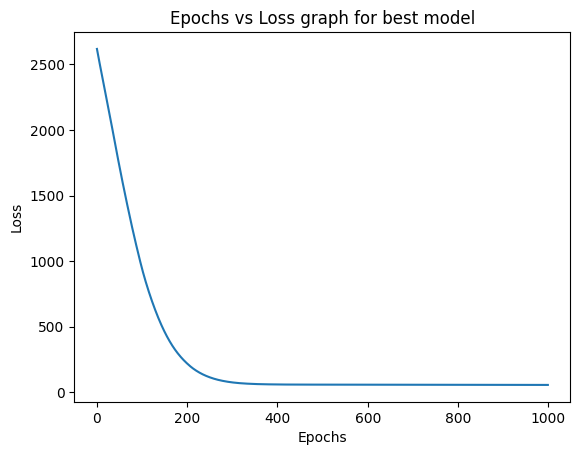

In [10]:
nuerons = [8,16,32,64,128,256]
min_err = 10000
again_loss = []
epochs = 1000
opt_degree = 0
for nueron in nuerons:
    model = SingleLayer(hidden1=nueron)
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    loss_arr = []
    for epoch in range(epochs):
        optimizer.zero_grad()
        model.train()
        output = model(X_train)
        loss=criterion(y_train.float(), output)
        loss_arr.append(loss.detach().numpy())
        loss.backward()
        optimizer.step()
    print(f"Training Losses for hidden layer {nueron}")
    loss_df = pd.DataFrame(loss_arr)
    print(loss_df.head())
    y_val_pred=model(X_val).detach().numpy()
    rmse =math.sqrt(mean_squared_error(y_val,y_val_pred))
    min_err = min(min_err,rmse)
    if rmse == min_err:
        again_loss = loss_arr
        opt_degree = nueron
    y_test_pred = model(X_test).detach().numpy()
    rmse_2 = math.sqrt(mean_squared_error(y_test,y_test_pred))
    print(f" RMSE for validation set is : {rmse}")
    print(f" RMSE for test set is : {rmse_2}")
print(f"The Least Validation is {min_err} for Hidden Layer of Size {opt_degree}")
plt.plot(range(epochs), again_loss)
plt.title('Epochs vs Loss graph for best model')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()  
    
 

In [21]:
class DoubleLayer(nn.Module):
    def __init__(self, hidden1, hidden2):
        super().__init__()
        self.layers = nn.Sequential(
        nn.Linear(33, hidden1),
        nn.Sigmoid(),
        nn.Linear(hidden1, hidden2),
        nn.Sigmoid(),
        nn.Linear(hidden2, 1)
        )
    def forward(self, x):
        return self.layers(x)

Training Losses for hidden layer 8
             0
0  2672.003662
1  2671.128906
2  2670.250000
3  2669.379150
4  2668.482422
 RMSE for validation set is : 42.43942287847247
 RMSE for test set is : 42.22651407837187
Training Losses for hidden layer 16
             0
0  2575.206787
1  2574.050049
2  2572.894531
3  2571.740967
4  2570.592773
 RMSE for validation set is : 33.310422220614754
 RMSE for test set is : 33.09236673808818
Training Losses for hidden layer 32
             0
0  2644.744629
1  2642.302490
2  2639.885742
3  2637.516113
4  2635.143311
 RMSE for validation set is : 21.34886097069569
 RMSE for test set is : 21.121385976224207
Training Losses for hidden layer 64
             0
0  2648.128418
1  2643.975342
2  2639.967285
3  2636.019043
4  2632.116943
 RMSE for validation set is : 8.913076896240758
 RMSE for test set is : 8.70677626224881
Training Losses for hidden layer 128
             0
0  2643.079590
1  2635.578125
2  2628.079102
3  2620.583984
4  2613.095459
 RMSE for

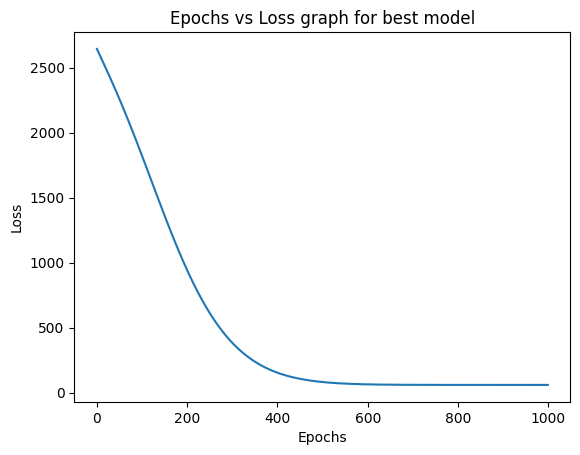

Training Losses for hidden layer 8
             0
0  2637.537842
1  2636.504395
2  2635.476318
3  2634.446777
4  2633.424072
 RMSE for validation set is : 43.23502015465515
 RMSE for test set is : 43.02197271998054
Training Losses for hidden layer 16
             0
0  2665.385986
1  2663.799316
2  2662.209229
3  2660.630615
4  2659.068115
 RMSE for validation set is : 35.79912387905342
 RMSE for test set is : 35.58257307778539
Training Losses for hidden layer 32
             0
0  2669.283447
1  2666.875244
2  2664.474609
3  2662.081055
4  2659.694336
 RMSE for validation set is : 21.66151406080032
 RMSE for test set is : 21.434501060051744
Training Losses for hidden layer 64
             0
0  2617.944580
1  2613.893066
2  2609.868408
3  2605.843994
4  2601.830322
 RMSE for validation set is : 9.057097830881814
 RMSE for test set is : 8.847468265111123
Training Losses for hidden layer 128
             0
0  2671.051270
1  2663.302246
2  2655.580078
3  2647.893555
4  2640.224609
 RMSE for

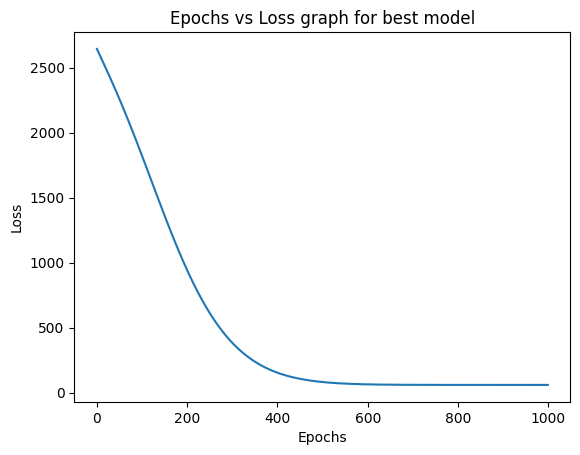

Training Losses for hidden layer 8
             0
0  2653.450684
1  2652.048584
2  2650.654541
3  2649.257080
4  2647.859619
 RMSE for validation set is : 43.888794906665815
 RMSE for test set is : 43.676027027581874
Training Losses for hidden layer 16
             0
0  2623.513672
1  2621.470947
2  2619.447021
3  2617.426514
4  2615.411133
 RMSE for validation set is : 34.94223399837044
 RMSE for test set is : 34.72526800877497
Training Losses for hidden layer 32
             0
0  2624.704346
1  2621.656250
2  2618.646729
3  2615.636963
4  2612.655518
 RMSE for validation set is : 22.732974881714366
 RMSE for test set is : 22.506918288597607
Training Losses for hidden layer 64
             0
0  2663.168213
1  2658.020752
2  2652.896729
3  2647.768799
4  2642.644043
 RMSE for validation set is : 9.150718085456036
 RMSE for test set is : 8.939291607741756
Training Losses for hidden layer 128
             0
0  2604.940918
1  2595.835938
2  2586.768799
3  2577.726562
4  2568.704590
 RMSE 

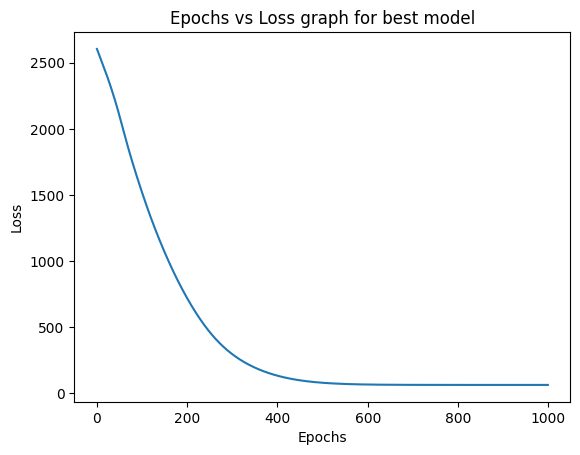

Training Losses for hidden layer 8
             0
0  2622.544922
1  2620.516846
2  2618.543945
3  2616.583984
4  2614.634033
 RMSE for validation set is : 43.6977170858573
 RMSE for test set is : 43.484864857553454
Training Losses for hidden layer 16
             0
0  2658.497803
1  2655.809326
2  2653.138916
3  2650.489258
4  2647.842773
 RMSE for validation set is : 41.755822421007196
 RMSE for test set is : 41.54217665705843
Training Losses for hidden layer 32
             0
0  2664.292236
1  2659.842285
2  2655.429932
3  2651.031250
4  2646.658447
 RMSE for validation set is : 27.93247363725765
 RMSE for test set is : 27.710811953479347
Training Losses for hidden layer 64
             0
0  2677.725830
1  2670.609863
2  2663.547852
3  2656.531982
4  2649.552734
 RMSE for validation set is : 13.15432688958157
 RMSE for test set is : 12.921122777001981
Training Losses for hidden layer 128
             0
0  2636.434082
1  2625.144287
2  2613.909668
3  2602.705078
4  2591.503906
 RMSE f

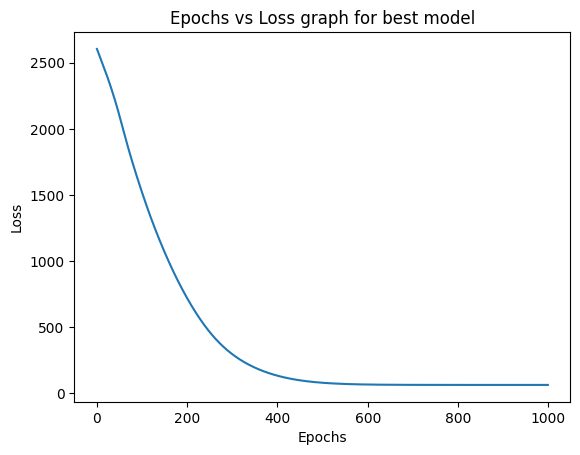

Training Losses for hidden layer 8
             0
0  2598.587402
1  2594.438721
2  2590.342285
3  2586.262939
4  2582.222900
 RMSE for validation set is : 43.297617900068275
 RMSE for test set is : 43.08460800872656
Training Losses for hidden layer 16
             0
0  2655.795654
1  2651.328613
2  2646.919922
3  2642.581055
4  2638.312500
 RMSE for validation set is : 40.433246371140854
 RMSE for test set is : 40.21900950528167
Training Losses for hidden layer 32
             0
0  2645.576660
1  2638.600098
2  2631.663086
3  2624.763916
4  2617.910645
 RMSE for validation set is : 31.023278141116773
 RMSE for test set is : 30.803847392170937
Training Losses for hidden layer 64
             0
0  2727.959229
1  2717.662598
2  2707.444580
3  2697.307373
4  2687.233398
 RMSE for validation set is : 18.239272217536275
 RMSE for test set is : 18.008819115032743
Training Losses for hidden layer 128
             0
0  2639.483154
1  2622.356201
2  2605.372314
3  2588.469971
4  2571.627441
 RMS

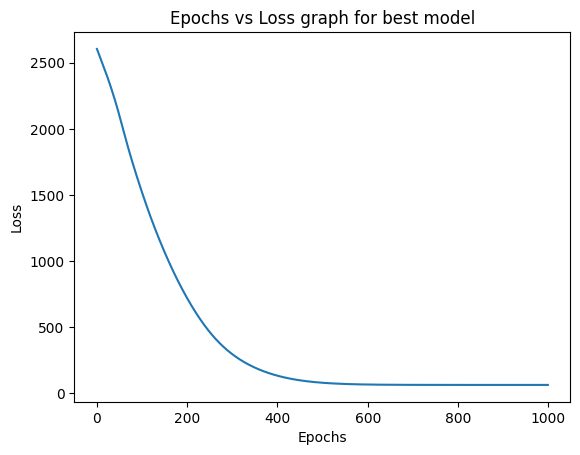

The Least Validation is 7.865162351063947 for Hidden Layer of Size 32 & 128


In [16]:
nuerons = [8,16,32,64,128]
min_err = 10000
best_fn = 0
best_sn = 0
again_loss = []
epochs = 1000
opt_degree = 0
for firstn in nuerons:
    for nueron in nuerons:
        model = DoubleLayer(hidden1=firstn, hidden2 = nueron)
        criterion = nn.MSELoss()
        optimizer = optim.Adam(model.parameters(), lr=0.001)
        loss_arr = []
        for epoch in range(epochs):
            optimizer.zero_grad()
            model.train()
            output = model(X_train)
            loss=criterion(y_train.float(), output)
            loss_arr.append(loss.detach().numpy())
            loss.backward()
            optimizer.step()
        print(f"Training Losses for hidden layer {nueron}")
        loss_df = pd.DataFrame(loss_arr)
        print(loss_df.head())
        y_val_pred=model(X_val).detach().numpy()
        rmse =math.sqrt(mean_squared_error(y_val,y_val_pred))
        min_err = min(min_err,rmse)
        if rmse == min_err:
            again_loss = loss_arr
            best_sn = nueron
            best_fn = firstn
        y_test_pred = model(X_test).detach().numpy()
        rmse_2 = math.sqrt(mean_squared_error(y_test,y_test_pred))
        print(f" RMSE for validation set is : {rmse}")
        print(f" RMSE for test set is : {rmse_2}")
    plt.plot(range(epochs), again_loss)
    plt.title('Epochs vs Loss graph for best model')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show()  
print(f"The Least Validation is {min_err} for Hidden Layer of Size {best_fn} & {best_sn}")
 

In [11]:
class TripleLayer(nn.Module):
    def __init__(self, hidden1, hidden2,hidden3):
        super().__init__()
        self.layers = nn.Sequential(
        nn.Linear(33, hidden1),
        nn.Sigmoid(),
        nn.Linear(hidden1, hidden2),
        nn.Sigmoid(),
        nn.Linear(hidden2, hidden3),
        nn.Sigmoid(),
        nn.Linear(hidden3, 1)
        )
    def forward(self, x):
        return self.layers(x)

Training Losses for hidden layer 8
             0
0  2656.318604
1  2655.681641
2  2655.044434
3  2654.407471
4  2653.769775
 RMSE for validation set is : 42.05706543411805 for combination 8 & 8 & 8
 RMSE for test set is : 41.84354141331506 for combination 8 & 8 & 8
Training Losses for hidden layer 16
             0
0  2595.595215
1  2594.387695
2  2593.177979
3  2591.966797
4  2590.752686
 RMSE for validation set is : 33.56898251234408 for combination 8 & 8 & 16
 RMSE for test set is : 33.351151650374085 for combination 8 & 8 & 16
Training Losses for hidden layer 32
             0
0  2660.256592
1  2658.113525
2  2655.972656
3  2653.832764
4  2651.695312
 RMSE for validation set is : 21.455526796770876 for combination 8 & 8 & 32
 RMSE for test set is : 21.228203579136544 for combination 8 & 8 & 32
Training Losses for hidden layer 64
             0
0  2640.519775
1  2636.657959
2  2632.798096
3  2628.939941
4  2625.082275
 RMSE for validation set is : 8.967274826961958 for combination 

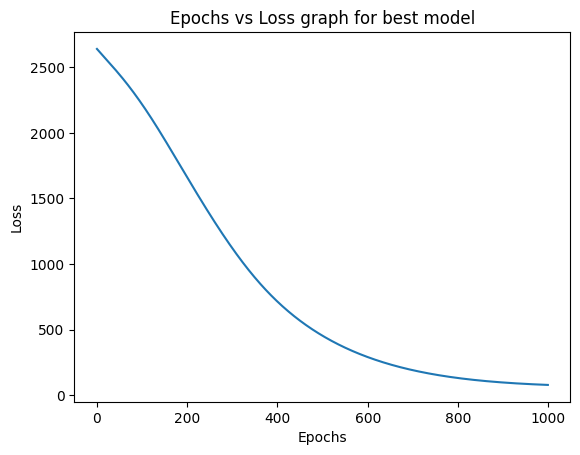

Training Losses for hidden layer 8
             0
0  2610.623047
1  2609.882568
2  2609.144531
3  2608.404785
4  2607.666504
 RMSE for validation set is : 41.741071100315125 for combination 8 & 8 & 64
 RMSE for test set is : 41.527412644861016 for combination 8 & 8 & 64
Training Losses for hidden layer 16
             0
0  2670.674561
1  2669.380615
2  2668.087402
3  2666.799805
4  2665.513916
 RMSE for validation set is : 35.02351679251564 for combination 8 & 8 & 64
 RMSE for test set is : 34.80646828356764 for combination 8 & 8 & 64
Training Losses for hidden layer 32
             0
0  2612.994873
1  2610.683594
2  2608.376465
3  2606.070312
4  2603.767090
 RMSE for validation set is : 21.049036086386845 for combination 8 & 8 & 64
 RMSE for test set is : 20.82133191101924 for combination 8 & 8 & 64
Training Losses for hidden layer 64
             0
0  2607.936035
1  2603.830322
2  2599.724854
3  2595.618164
4  2591.509766
 RMSE for validation set is : 8.967954168333602 for combinatio

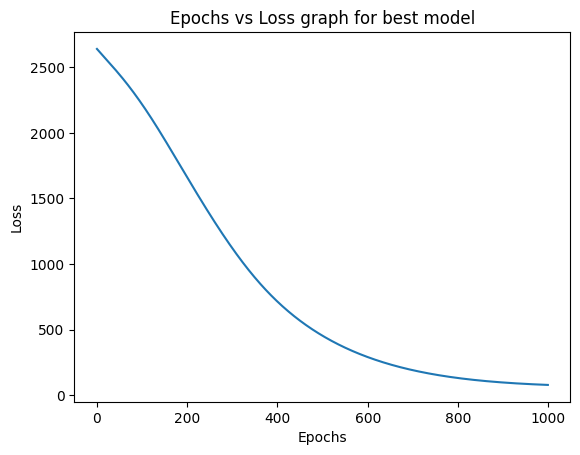

Training Losses for hidden layer 8
             0
0  2662.435547
1  2661.368652
2  2660.307617
3  2659.250244
4  2658.195312
 RMSE for validation set is : 45.35300452595451 for combination 8 & 8 & 64
 RMSE for test set is : 45.14079671782846 for combination 8 & 8 & 64
Training Losses for hidden layer 16
             0
0  2700.470703
1  2698.464600
2  2696.468262
3  2694.487793
4  2692.514893
 RMSE for validation set is : 38.21479723273516 for combination 8 & 8 & 64
 RMSE for test set is : 37.99951492803066 for combination 8 & 8 & 64
Training Losses for hidden layer 32
             0
0  2676.549561
1  2673.745117
2  2670.947754
3  2668.156250
4  2665.371094
 RMSE for validation set is : 22.52066786214457 for combination 8 & 8 & 64
 RMSE for test set is : 22.294374257537623 for combination 8 & 8 & 64
Training Losses for hidden layer 64
             0
0  2640.909912
1  2635.891113
2  2630.881348
3  2625.878418
4  2620.880371
 RMSE for validation set is : 9.130062841259722 for combination 

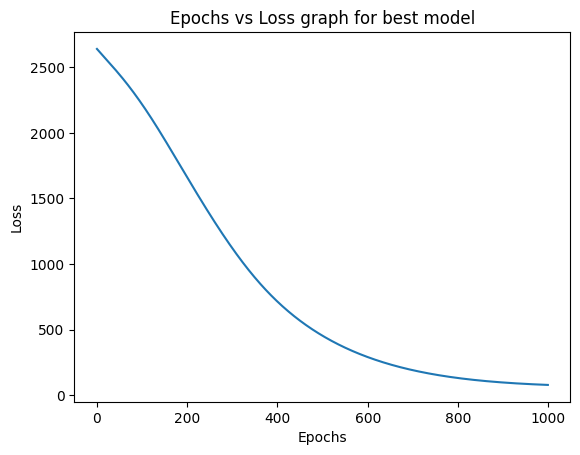

Training Losses for hidden layer 8
             0
0  2619.558594
1  2618.069580
2  2616.587158
3  2615.111084
4  2613.642578
 RMSE for validation set is : 44.81079336664815 for combination 8 & 8 & 64
 RMSE for test set is : 44.598381416818256 for combination 8 & 8 & 64
Training Losses for hidden layer 16
             0
0  2646.614258
1  2643.823975
2  2641.041504
3  2638.261719
4  2635.484375
 RMSE for validation set is : 39.6511013575561 for combination 8 & 8 & 64
 RMSE for test set is : 39.43650949627769 for combination 8 & 8 & 64
Training Losses for hidden layer 32
             0
0  2671.391113
1  2667.371094
2  2663.369385
3  2659.385986
4  2655.420410
 RMSE for validation set is : 27.47291257389665 for combination 8 & 8 & 64
 RMSE for test set is : 27.250910472533413 for combination 8 & 8 & 64
Training Losses for hidden layer 64
             0
0  2639.090576
1  2632.137695
2  2625.195312
3  2618.261475
4  2611.336914
 RMSE for validation set is : 10.800821513261301 for combination

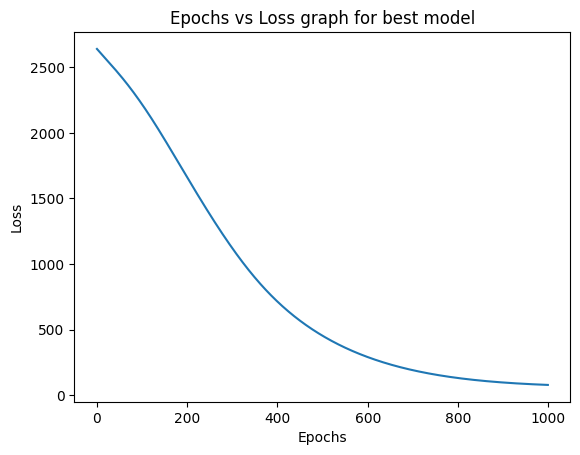

Training Losses for hidden layer 8
             0
0  2639.586914
1  2638.907471
2  2638.227783
3  2637.549072
4  2636.870361
 RMSE for validation set is : 41.81821738984174 for combination 8 & 8 & 64
 RMSE for test set is : 41.60459422638547 for combination 8 & 8 & 64
Training Losses for hidden layer 16
             0
0  2673.563965
1  2672.337891
2  2671.115234
3  2669.895752
4  2668.679443
 RMSE for validation set is : 34.7920107034512 for combination 8 & 8 & 64
 RMSE for test set is : 34.57491229991589 for combination 8 & 8 & 64
Training Losses for hidden layer 32
             0
0  2612.834229
1  2610.669678
2  2608.511475
3  2606.355469
4  2604.197266
 RMSE for validation set is : 20.420032374312456 for combination 8 & 8 & 64
 RMSE for test set is : 20.1917104198167 for combination 8 & 8 & 64
Training Losses for hidden layer 64
             0
0  2616.947266
1  2613.179443
2  2609.414795
3  2605.654785
4  2601.897217
 RMSE for validation set is : 8.936923775404086 for combination 16

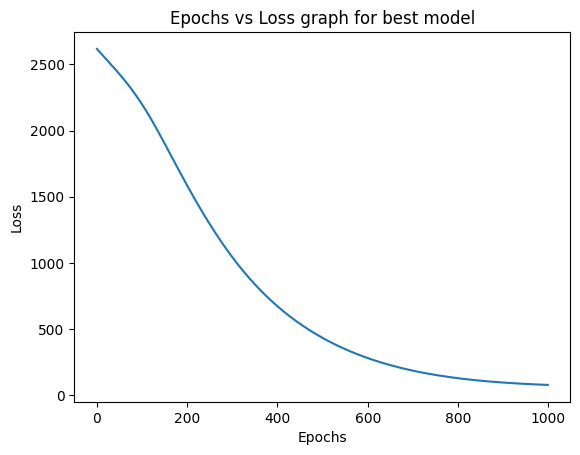

Training Losses for hidden layer 8
             0
0  2614.055664
1  2613.241455
2  2612.427246
3  2611.614746
4  2610.802002
 RMSE for validation set is : 41.478496817534115 for combination 16 & 8 & 64
 RMSE for test set is : 41.26472423051331 for combination 16 & 8 & 64
Training Losses for hidden layer 16
             0
0  2655.711182
1  2654.190186
2  2652.671631
3  2651.155273
4  2649.638672
 RMSE for validation set is : 35.2601624036869 for combination 16 & 8 & 64
 RMSE for test set is : 35.04332732545616 for combination 16 & 8 & 64
Training Losses for hidden layer 32
             0
0  2606.011963
1  2603.523926
2  2601.040039
3  2598.558594
4  2596.078369
 RMSE for validation set is : 21.27085589022535 for combination 16 & 8 & 64
 RMSE for test set is : 21.043366477469288 for combination 16 & 8 & 64
Training Losses for hidden layer 64
             0
0  2663.529053
1  2659.092041
2  2654.661621
3  2650.239258
4  2645.824219
 RMSE for validation set is : 9.148799429753577 for combin

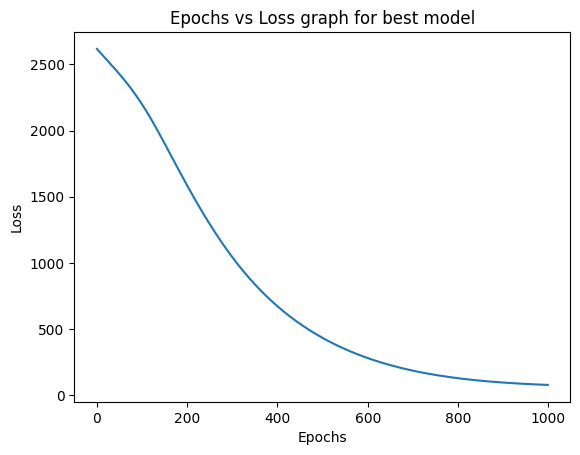

Training Losses for hidden layer 8
             0
0  2670.139404
1  2669.054443
2  2667.977051
3  2666.905762
4  2665.838379
 RMSE for validation set is : 46.04611150537714 for combination 16 & 8 & 64
 RMSE for test set is : 45.83416310801911 for combination 16 & 8 & 64
Training Losses for hidden layer 16
             0
0  2609.950195
1  2607.944336
2  2605.937744
3  2603.926758
4  2601.916748
 RMSE for validation set is : 35.69877742949942 for combination 16 & 8 & 64
 RMSE for test set is : 35.48218529956706 for combination 16 & 8 & 64
Training Losses for hidden layer 32
             0
0  2626.827393
1  2623.980713
2  2621.144043
3  2618.315430
4  2615.493408
 RMSE for validation set is : 23.230472362640548 for combination 16 & 8 & 64
 RMSE for test set is : 23.004846476900934 for combination 16 & 8 & 64
Training Losses for hidden layer 64
             0
0  2632.550781
1  2627.543945
2  2622.545654
3  2617.556885
4  2612.573242
 RMSE for validation set is : 9.249648628778251 for combi

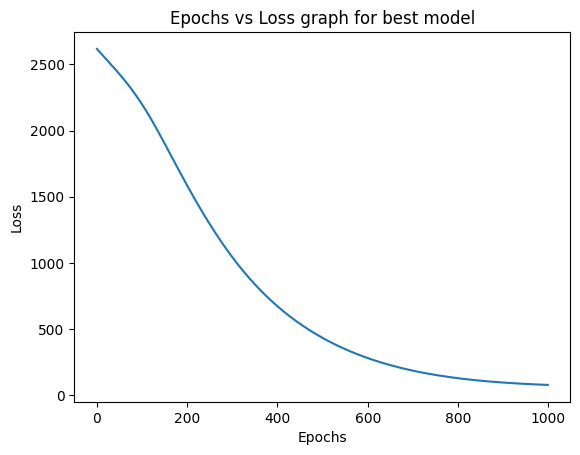

Training Losses for hidden layer 8
             0
0  2666.314453
1  2664.337402
2  2662.368896
3  2660.405762
4  2658.449219
 RMSE for validation set is : 45.9064972976661 for combination 16 & 8 & 64
 RMSE for test set is : 45.69449704884468 for combination 16 & 8 & 64
Training Losses for hidden layer 16
             0
0  2618.020752
1  2615.258057
2  2612.502930
3  2609.751465
4  2607.005615
 RMSE for validation set is : 38.52687462485602 for combination 16 & 8 & 64
 RMSE for test set is : 38.31174486918959 for combination 16 & 8 & 64
Training Losses for hidden layer 32
             0
0  2600.126465
1  2596.298096
2  2592.468262
3  2588.638428
4  2584.809326
 RMSE for validation set is : 24.59511119366827 for combination 16 & 8 & 64
 RMSE for test set is : 24.370719025108414 for combination 16 & 8 & 64
Training Losses for hidden layer 64
             0
0  2600.912598
1  2594.139404
2  2587.360352
3  2580.576416
4  2573.785645
 RMSE for validation set is : 10.75092471381641 for combina

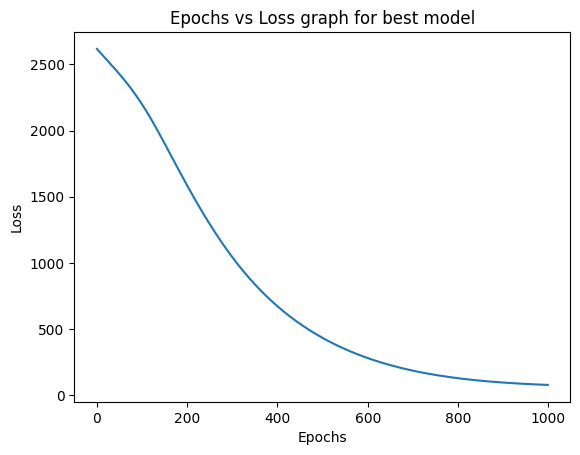

Training Losses for hidden layer 8
             0
0  2646.860107
1  2646.099365
2  2645.342285
3  2644.584717
4  2643.826904
 RMSE for validation set is : 41.84096681371321 for combination 16 & 8 & 64
 RMSE for test set is : 41.627353361120164 for combination 16 & 8 & 64
Training Losses for hidden layer 16
             0
0  2640.906006
1  2639.743896
2  2638.583496
3  2637.423584
4  2636.262939
 RMSE for validation set is : 33.87715665701687 for combination 16 & 8 & 64
 RMSE for test set is : 33.659526810654775 for combination 16 & 8 & 64
Training Losses for hidden layer 32
             0
0  2630.119385
1  2627.959229
2  2625.801270
3  2623.643555
4  2621.486572
 RMSE for validation set is : 20.9920544806448 for combination 16 & 8 & 64
 RMSE for test set is : 20.764293481577035 for combination 16 & 8 & 64
Training Losses for hidden layer 64
             0
0  2641.231445
1  2637.280762
2  2633.332520
3  2629.386719
4  2625.441406
 RMSE for validation set is : 9.070252778926992 for combi

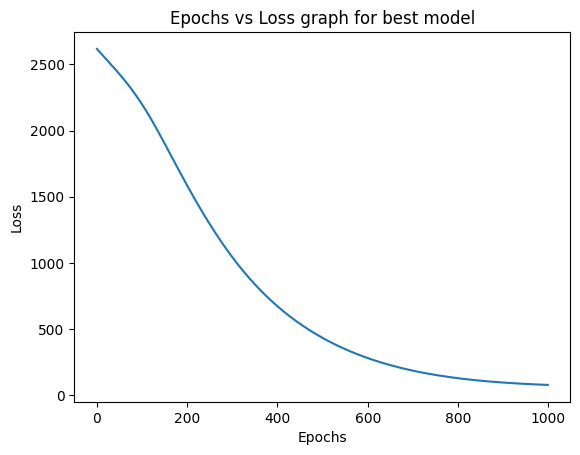

Training Losses for hidden layer 8
             0
0  2592.365234
1  2591.473145
2  2590.582275
3  2589.690674
4  2588.798340
 RMSE for validation set is : 41.834450107779745 for combination 16 & 8 & 64
 RMSE for test set is : 41.620832538187834 for combination 16 & 8 & 64
Training Losses for hidden layer 16
             0
0  2619.022217
1  2617.654541
2  2616.286377
3  2614.915039
4  2613.541748
 RMSE for validation set is : 34.674508406077294 for combination 16 & 8 & 64
 RMSE for test set is : 34.45734278321077 for combination 16 & 8 & 64
Training Losses for hidden layer 32
             0
0  2648.728027
1  2646.404785
2  2644.081055
3  2641.757324
4  2639.432373
 RMSE for validation set is : 21.607404132150585 for combination 16 & 8 & 64
 RMSE for test set is : 21.380243383294452 for combination 16 & 8 & 64
Training Losses for hidden layer 64
             0
0  2625.629883
1  2621.381104
2  2617.137939
3  2612.896973
4  2608.657959
 RMSE for validation set is : 9.063229025095202 for co

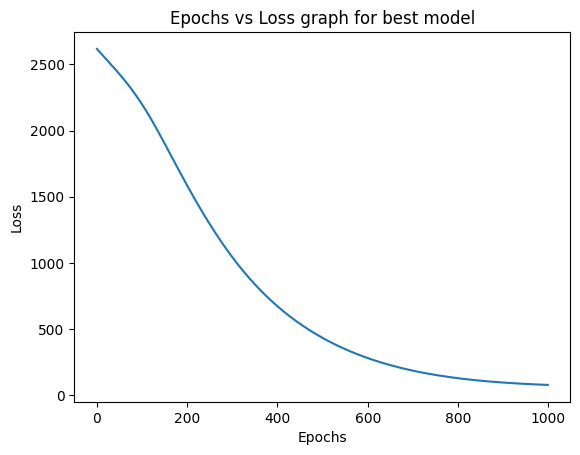

Training Losses for hidden layer 8
             0
0  2622.103271
1  2620.798340
2  2619.494873
3  2618.192627
4  2616.890137
 RMSE for validation set is : 43.07569078632112 for combination 16 & 8 & 64
 RMSE for test set is : 42.8625918748104 for combination 16 & 8 & 64
Training Losses for hidden layer 16
             0
0  2627.284668
1  2625.264648
2  2623.253906
3  2621.245605
4  2619.244629
 RMSE for validation set is : 37.599578075882384 for combination 16 & 8 & 64
 RMSE for test set is : 37.38398721377911 for combination 16 & 8 & 64
Training Losses for hidden layer 32
             0
0  2652.613525
1  2649.570312
2  2646.531982
3  2643.500244
4  2640.474121
 RMSE for validation set is : 25.97402125727623 for combination 16 & 8 & 64
 RMSE for test set is : 25.75080944381591 for combination 16 & 8 & 64
Training Losses for hidden layer 64
             0
0  2664.173584
1  2658.781250
2  2653.398193
3  2648.023438
4  2642.651611
 RMSE for validation set is : 9.45491452263695 for combinat

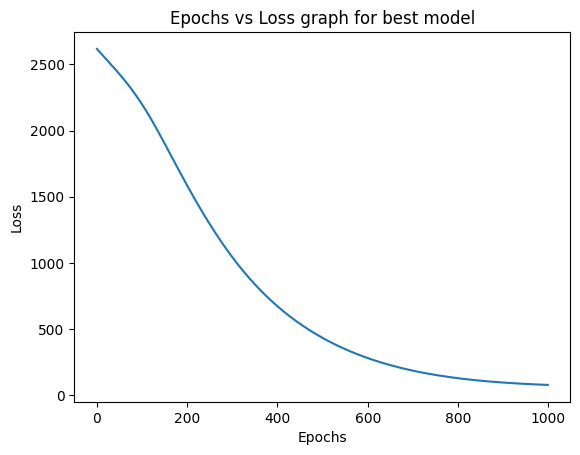

Training Losses for hidden layer 8
             0
0  2692.252930
1  2690.641357
2  2689.041504
3  2687.455078
4  2685.878418
 RMSE for validation set is : 47.32936301616181 for combination 16 & 8 & 64
 RMSE for test set is : 47.11787340426799 for combination 16 & 8 & 64
Training Losses for hidden layer 16
             0
0  2714.252930
1  2711.300781
2  2708.365234
3  2705.446289
4  2702.542236
 RMSE for validation set is : 43.170242063308926 for combination 16 & 8 & 64
 RMSE for test set is : 42.95718026055132 for combination 16 & 8 & 64
Training Losses for hidden layer 32
             0
0  2646.238525
1  2642.002930
2  2637.781982
3  2633.570312
4  2629.365479
 RMSE for validation set is : 25.67824950339477 for combination 16 & 8 & 64
 RMSE for test set is : 25.454790317298947 for combination 16 & 8 & 64
Training Losses for hidden layer 64
             0
0  2611.104736
1  2604.567383
2  2598.041992
3  2591.527344
4  2585.022705
 RMSE for validation set is : 10.821137787231706 for comb

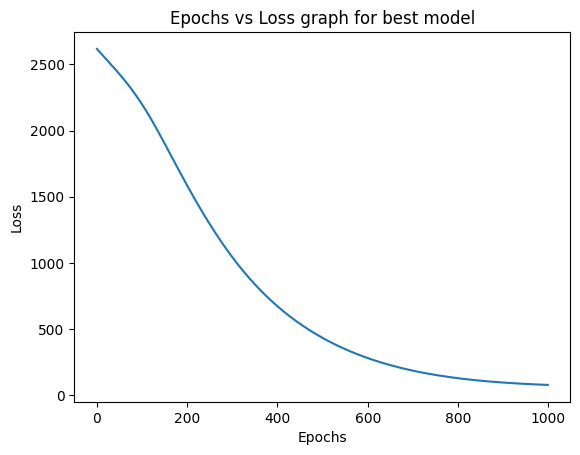

Training Losses for hidden layer 8
             0
0  2653.818359
1  2652.795410
2  2651.779785
3  2650.764648
4  2649.753906
 RMSE for validation set is : 42.61681871403223 for combination 16 & 8 & 64
 RMSE for test set is : 42.40353108223639 for combination 16 & 8 & 64
Training Losses for hidden layer 16
             0
0  2630.378662
1  2629.043213
2  2627.710693
3  2626.376953
4  2625.043457
 RMSE for validation set is : 34.01035644775169 for combination 16 & 8 & 64
 RMSE for test set is : 33.7928041642189 for combination 16 & 8 & 64
Training Losses for hidden layer 32
             0
0  2654.973389
1  2652.712646
2  2650.460449
3  2648.208984
4  2645.959717
 RMSE for validation set is : 20.956738188188574 for combination 16 & 8 & 64
 RMSE for test set is : 20.728945425824172 for combination 16 & 8 & 64
Training Losses for hidden layer 64
             0
0  2573.208252
1  2569.227051
2  2565.253418
3  2561.291504
4  2557.338135
 RMSE for validation set is : 8.919491424431541 for combin

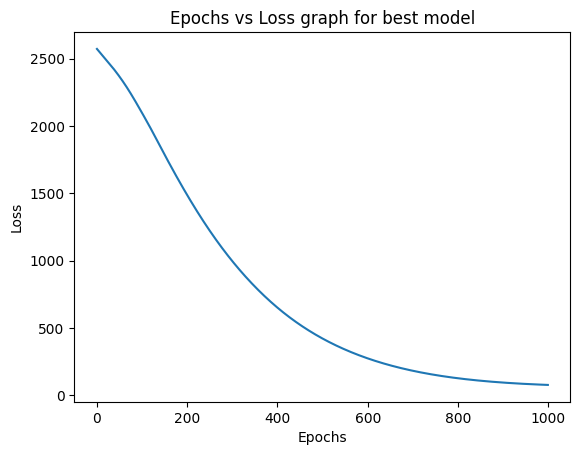

Training Losses for hidden layer 8
             0
0  2629.773926
1  2628.584961
2  2627.399658
3  2626.216553
4  2625.035400
 RMSE for validation set is : 42.98295787831207 for combination 64 & 8 & 64
 RMSE for test set is : 42.7698207660422 for combination 64 & 8 & 64
Training Losses for hidden layer 16
             0
0  2694.659424
1  2693.172607
2  2691.699219
3  2690.233887
4  2688.775879
 RMSE for validation set is : 35.806152633398774 for combination 64 & 8 & 64
 RMSE for test set is : 35.58961887516762 for combination 64 & 8 & 64
Training Losses for hidden layer 32
             0
0  2616.955078
1  2614.388428
2  2611.825928
3  2609.261963
4  2606.697510
 RMSE for validation set is : 21.20443615833651 for combination 64 & 8 & 64
 RMSE for test set is : 20.97688474496429 for combination 64 & 8 & 64
Training Losses for hidden layer 64
             0
0  2594.191895
1  2589.727783
2  2585.272949
3  2580.827393
4  2576.391113
 RMSE for validation set is : 9.053193042250557 for combina

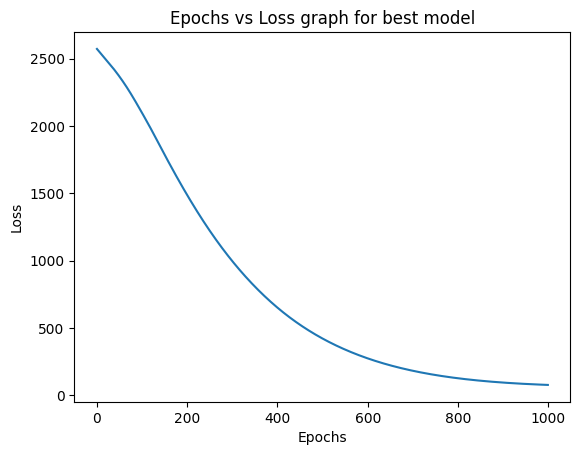

Training Losses for hidden layer 8
             0
0  2604.299072
1  2602.635742
2  2600.975098
3  2599.313232
4  2597.651123
 RMSE for validation set is : 44.280017736029926 for combination 64 & 8 & 64
 RMSE for test set is : 44.06740054752067 for combination 64 & 8 & 64
Training Losses for hidden layer 16
             0
0  2600.869385
1  2598.399658
2  2595.920654
3  2593.431641
4  2590.935547
 RMSE for validation set is : 36.20193978692216 for combination 64 & 8 & 64
 RMSE for test set is : 35.98561826174017 for combination 64 & 8 & 64
Training Losses for hidden layer 32
             0
0  2645.773926
1  2642.428223
2  2639.095215
3  2635.773926
4  2632.458252
 RMSE for validation set is : 25.16780960148735 for combination 64 & 8 & 64
 RMSE for test set is : 24.943914138303604 for combination 64 & 8 & 64
Training Losses for hidden layer 64
             0
0  2633.666748
1  2628.124268
2  2622.574219
3  2617.010742
4  2611.437744
 RMSE for validation set is : 9.712068769585409 for combi

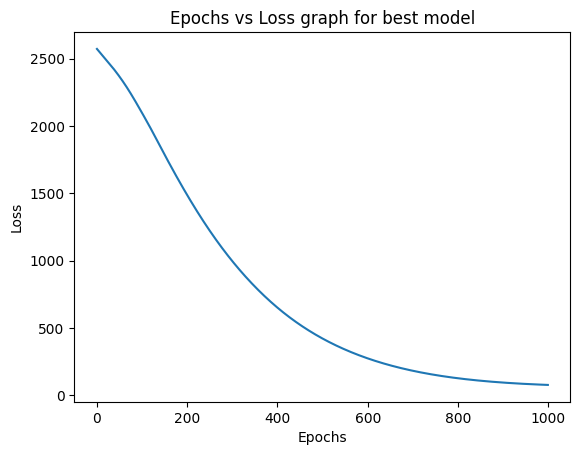

Training Losses for hidden layer 8
             0
0  2625.934814
1  2623.870605
2  2621.820557
3  2619.779785
4  2617.745605
 RMSE for validation set is : 45.66870231453648 for combination 64 & 8 & 64
 RMSE for test set is : 45.45661350054027 for combination 64 & 8 & 64
Training Losses for hidden layer 16
             0
0  2594.726562
1  2591.821533
2  2588.913086
3  2586.002686
4  2583.085938
 RMSE for validation set is : 37.65045501312451 for combination 64 & 8 & 64
 RMSE for test set is : 37.43488813405718 for combination 64 & 8 & 64
Training Losses for hidden layer 32
             0
0  2689.885010
1  2685.235596
2  2680.637207
3  2676.083740
4  2671.574219
 RMSE for validation set is : 30.997098725437695 for combination 64 & 8 & 64
 RMSE for test set is : 30.777652867228603 for combination 64 & 8 & 64
Training Losses for hidden layer 64
             0
0  2621.644775
1  2614.418213
2  2607.200439
3  2599.984863
4  2592.767334
 RMSE for validation set is : 11.202179723893304 for comb

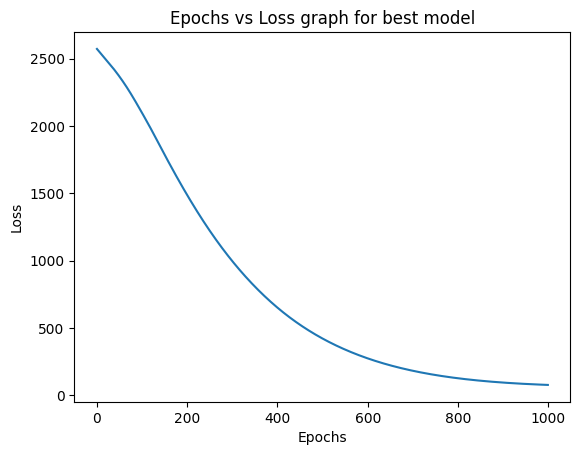

The Least Validation is 8.919491424431541 for Hidden Layer of Size 64 & 8 & 64


In [12]:
nuerons = [8,16,32,64]
min_err = 10000
best_fn = 0
best_sn = 0
best_tn = 0
again_loss = []
epochs = 1000
opt_degree = 0
for nueronF in nuerons:
    for firstn in nuerons:
        for nueron in nuerons:
            model = TripleLayer(hidden1=nueronF,hidden2=firstn, hidden3 = nueron)
            criterion = nn.MSELoss()
            optimizer = optim.Adam(model.parameters(), lr=0.001)
            loss_arr = []
            for epoch in range(epochs):
                optimizer.zero_grad()
                model.train()
                output = model(X_train)
                loss=criterion(y_train.float(), output)
                loss_arr.append(loss.detach().numpy())
                loss.backward()
                optimizer.step()
            print(f"Training Losses for hidden layer {nueron}")
            loss_df = pd.DataFrame(loss_arr)
            print(loss_df.head())
            y_val_pred=model(X_val).detach().numpy()
            rmse =math.sqrt(mean_squared_error(y_val,y_val_pred))
            min_err = min(min_err,rmse)
            if rmse == min_err:
                again_loss = loss_arr
                best_sn = firstn
                best_fn = nueronF
                best_tn = nueron
            y_test_pred = model(X_test).detach().numpy()
            rmse_2 = math.sqrt(mean_squared_error(y_test,y_test_pred))
            print(f" RMSE for validation set is : {rmse} for combination {best_fn} & {best_sn} & {best_tn}")
            print(f" RMSE for test set is : {rmse_2} for combination {best_fn} & {best_sn} & {best_tn}")
        plt.plot(range(epochs), again_loss)
        plt.title('Epochs vs Loss graph for best model')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.show()  
print(f"The Least Validation is {min_err} for Hidden Layer of Size {best_fn} & {best_sn} & {best_tn}")
 

In [18]:
model = SingleLayer(hidden1=256)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
loss_arr = []

for epoch in range(epochs):
    optimizer.zero_grad()
    model.train()
    
    output = model(X_train)
    loss = criterion(y_train.float(), output)
    loss_arr.append(loss.detach().numpy())
    
    loss.backward()
    optimizer.step()

model.eval()
with torch.no_grad():
    y_val_pred = model(X_test).detach().numpy()


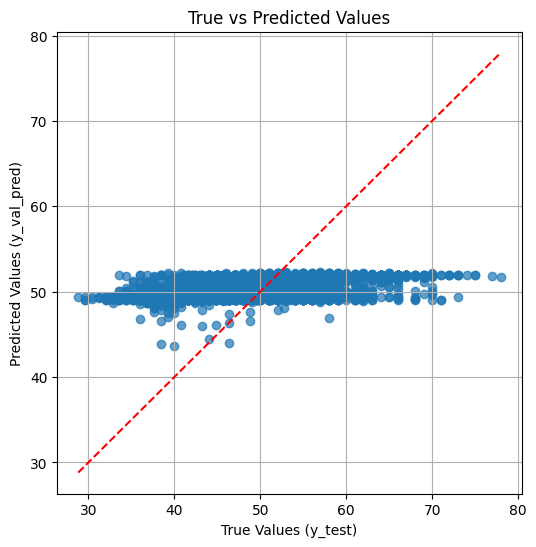

In [19]:
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_val_pred, alpha=0.7)
plt.xlabel("True Values (y_test)")
plt.ylabel("Predicted Values (y_val_pred)")
plt.title("True vs Predicted Values")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Ideal line
plt.grid(True)
plt.show()

In [22]:
model = DoubleLayer(hidden1=32,hidden2 = 128)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
loss_arr = []

for epoch in range(epochs):
    optimizer.zero_grad()
    model.train()
    
    output = model(X_train)
    loss = criterion(y_train.float(), output)
    loss_arr.append(loss.detach().numpy())
    
    loss.backward()
    optimizer.step()

model.eval()
with torch.no_grad():
    y_val_pred = model(X_test).detach().numpy()


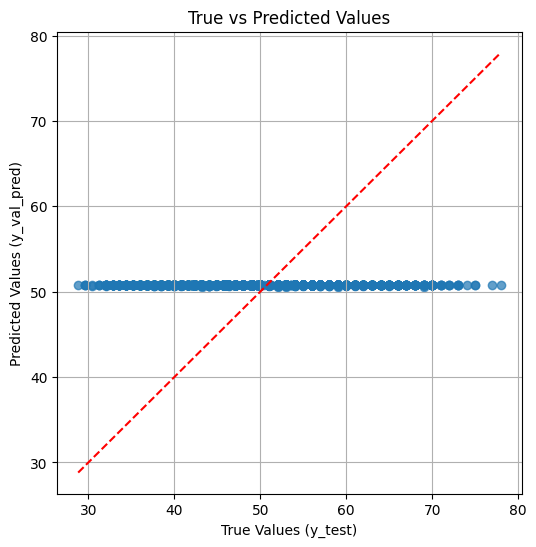

In [23]:
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_val_pred, alpha=0.7)
plt.xlabel("True Values (y_test)")
plt.ylabel("Predicted Values (y_val_pred)")
plt.title("True vs Predicted Values")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Ideal line
plt.grid(True)
plt.show()

In [ ]:
model = DoubleLayer(hidden1=64,hidden2 = 8, hidden)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
loss_arr = []

for epoch in range(epochs):
    optimizer.zero_grad()
    model.train()
    
    output = model(X_train)
    loss = criterion(y_train.float(), output)
    loss_arr.append(loss.detach().numpy())
    
    loss.backward()
    optimizer.step()

model.eval()
with torch.no_grad():
    y_val_pred = model(X_test).detach().numpy()
